<a href="https://colab.research.google.com/github/SheikhAliTassadaq/pytorch_wrkflow_LR/blob/main/pytorch_workflow_fund_LR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
print(torch.__version__)

2.4.0+cu121


**INTORDUCTION TO TENSORS**


CREATING TENSOR

pytorch tensor are created using torch.Tensor()

In [2]:
scaler = torch.tensor(7)
scaler


tensor(7)

In [3]:
scaler.ndim

0

In [4]:
scaler.item()

7

In [5]:
vector = torch.tensor([7,7])
vector

tensor([7, 7])

In [6]:
vector.ndim

1

In [7]:
vector.shape

torch.Size([2])

In [8]:
MATRIX = torch.tensor([[7,8],[9,10]])
MATRIX

tensor([[ 7,  8],
        [ 9, 10]])

In [9]:
MATRIX.ndim

2

In [10]:
MATRIX[1]


tensor([ 9, 10])

In [11]:
MATRIX.shape

torch.Size([2, 2])

In [12]:
TENSOR = torch.tensor([[[1,2,4,5,6],[3,45,6,7,5],[2,7,84,3,2],[34,23,56,77,4]]])
TENSOR

tensor([[[ 1,  2,  4,  5,  6],
         [ 3, 45,  6,  7,  5],
         [ 2,  7, 84,  3,  2],
         [34, 23, 56, 77,  4]]])

In [13]:
TENSOR.shape

torch.Size([1, 4, 5])

### Random tensors

Why random tensors?

Random tensors are important because the way many neural networks learn is that
they start with tensors full of random numbers and then adjust those random numbers
to better represent the data.

`Start with random numbers -> look at data -> update random numbers -> look at data
-> update random numbers |

In [14]:
random_tensor = torch.rand(3,4,3)
random_tensor

tensor([[[0.7890, 0.1111, 0.7549],
         [0.6819, 0.9319, 0.5044],
         [0.4988, 0.5522, 0.0488],
         [0.5528, 0.3405, 0.9829]],

        [[0.7928, 0.2329, 0.0679],
         [0.3301, 0.1514, 0.0505],
         [0.3154, 0.4048, 0.9852],
         [0.1216, 0.7804, 0.4066]],

        [[0.0333, 0.4715, 0.5169],
         [0.9902, 0.9027, 0.7945],
         [0.0451, 0.9496, 0.8777],
         [0.1921, 0.5998, 0.5838]]])

In [15]:
random_tensor.ndim

3

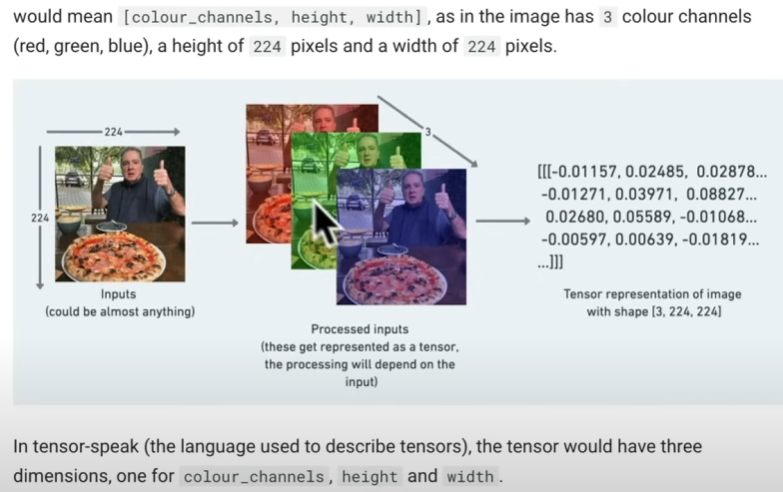

In [16]:
# Create a random tensor with similar shape to an image tensor
random_image_size_tensor = torch.rand(size=(3, 224, 224 )) # colour_channel, height , width,
random_image_size_tensor.shape, random_image_size_tensor.ndim # make sure you use the correct variable name here

(torch.Size([3, 224, 224]), 3)

In [17]:
zeros = torch.zeros(3,4)
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [18]:
zeros.dtype

torch.float32

In [19]:
torch.arange(0,11)

tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [20]:
one_to_hundered = torch.arange(start=1 , end=100 , step=25)
one_to_hundered

tensor([ 1, 26, 51, 76])

In [21]:
# creating tensor like
ten_zeros = torch.zeros_like(input=one_to_hundered)
ten_zeros

tensor([0, 0, 0, 0])

In [22]:
# Float 32 tensor
float_32_tensor = torch.tensor([3.0, 6.0, 9.0],
                               dtype=None, # what datatype is the tensor (e.g. float32 or float16)
                               device=None, # What device is your tensor on
                               requires_grad=False) # whether or not to track gradients
float_32_tensor

tensor([3., 6., 9.])

In [23]:
float_32_tensor.dtype

torch.float32

In [24]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

**Reshaping, stacking, squeezing and unsqueezing tensors**

. Reshaping - reshapes an input tensor to a defined shape

. View - Return a view of an input tensor of certain shape but keep the same memory as the original tensor

. Stacking - combine multiple tensors on top of each other (vstack) or side by side (hstack)

. Squeeze - remdves all 1 dimensions from a tensor

. Unsqueeze - aes a 1 dimension to a target tensor

. Permute - Return a view of the input with dimensions permuted (swapped) in a certain way

In [25]:
#create a tensor
import torch
x = torch.arange(1.,20.)
x , x.shape , x.ndim

(tensor([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
         15., 16., 17., 18., 19.]),
 torch.Size([19]),
 1)

In [26]:
#add an extra dimension
x_reshaped  = x.reshape(1 , 19)
x_reshaped , x_reshaped.shape ,x.ndim

(tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
          15., 16., 17., 18., 19.]]),
 torch.Size([1, 19]),
 1)

In [27]:
# view
z = x.view(1,19)
z , z.shape

(tensor([[ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
          15., 16., 17., 18., 19.]]),
 torch.Size([1, 19]))

In [28]:
#Return a view of an input tensor of certain shape but keep the same memory as the original tensor
z[:,1] = 10
z , x

(tensor([[ 1., 10.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
          15., 16., 17., 18., 19.]]),
 tensor([ 1., 10.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
         15., 16., 17., 18., 19.]))

In [29]:
#stacking
x_stacked = torch.stack([x,x,x], dim=0)
x_stacked

tensor([[ 1., 10.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
         15., 16., 17., 18., 19.],
        [ 1., 10.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
         15., 16., 17., 18., 19.],
        [ 1., 10.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
         15., 16., 17., 18., 19.]])

In [30]:
x_reshaped.shape

torch.Size([1, 19])

In [31]:
x_reshaped

tensor([[ 1., 10.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
         15., 16., 17., 18., 19.]])

In [32]:
#squeezing and unsqueezing
x_reshaped.squeeze()

tensor([ 1., 10.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19.])

In [33]:
x_reshaped.squeeze()

tensor([ 1., 10.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
        15., 16., 17., 18., 19.])

In [34]:
x_reshaped.squeeze().shape

torch.Size([19])

In [35]:
x_reshaped.unsqueeze(dim=1) , x_reshaped.unsqueeze(dim=1).shape ,x_reshaped.ndim

(tensor([[[ 1., 10.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13., 14.,
           15., 16., 17., 18., 19.]]]),
 torch.Size([1, 1, 19]),
 2)

In [36]:
# permute

x_orignal = torch.randint(1,10, size=(2,3,4))
x_orignal




tensor([[[8, 7, 4, 5],
         [7, 8, 3, 6],
         [2, 3, 4, 2]],

        [[9, 6, 8, 6],
         [4, 4, 9, 1],
         [7, 8, 7, 8]]])

In [37]:
x_permuted = x_orignal.permute(2,0,1)
x_permuted , x_permuted.shape

(tensor([[[8, 7, 2],
          [9, 4, 7]],
 
         [[7, 8, 3],
          [6, 4, 8]],
 
         [[4, 3, 4],
          [8, 9, 7]],
 
         [[5, 6, 2],
          [6, 1, 8]]]),
 torch.Size([4, 2, 3]))

In [38]:
x_orignal[0,0,0] = 1242
x_orignal , x_permuted[0,0,0]

(tensor([[[1242,    7,    4,    5],
          [   7,    8,    3,    6],
          [   2,    3,    4,    2]],
 
         [[   9,    6,    8,    6],
          [   4,    4,    9,    1],
          [   7,    8,    7,    8]]]),
 tensor(1242))

**INDEXING(SELECTING DATA FROM TENSOR)**

In [39]:
import torch
x = torch.arange(2,10,2)
z =torch.reshape(x , (1,2,2))

print(x)
print(z)
x.shape , x

tensor([2, 4, 6, 8])
tensor([[[2, 4],
         [6, 8]]])


(torch.Size([4]), tensor([2, 4, 6, 8]))

In [40]:
z[0]

tensor([[2, 4],
        [6, 8]])

In [41]:
z[0,0]

tensor([2, 4])

In [42]:
z[0,0,0]

tensor(2)

In [43]:
z[:,1,:]

tensor([[6, 8]])

In [44]:
z[0,1,:]

tensor([6, 8])

In [45]:
import torch
from torch import nn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [46]:
torch.__version__

'2.4.0+cu121'


Data can be almost anything ... in machine learning.

* Excel speadsheet
* Images of any kind
* Videos (YouTube has lots of data ... )
* Audio like songs or podcasts
* DNA
* Text

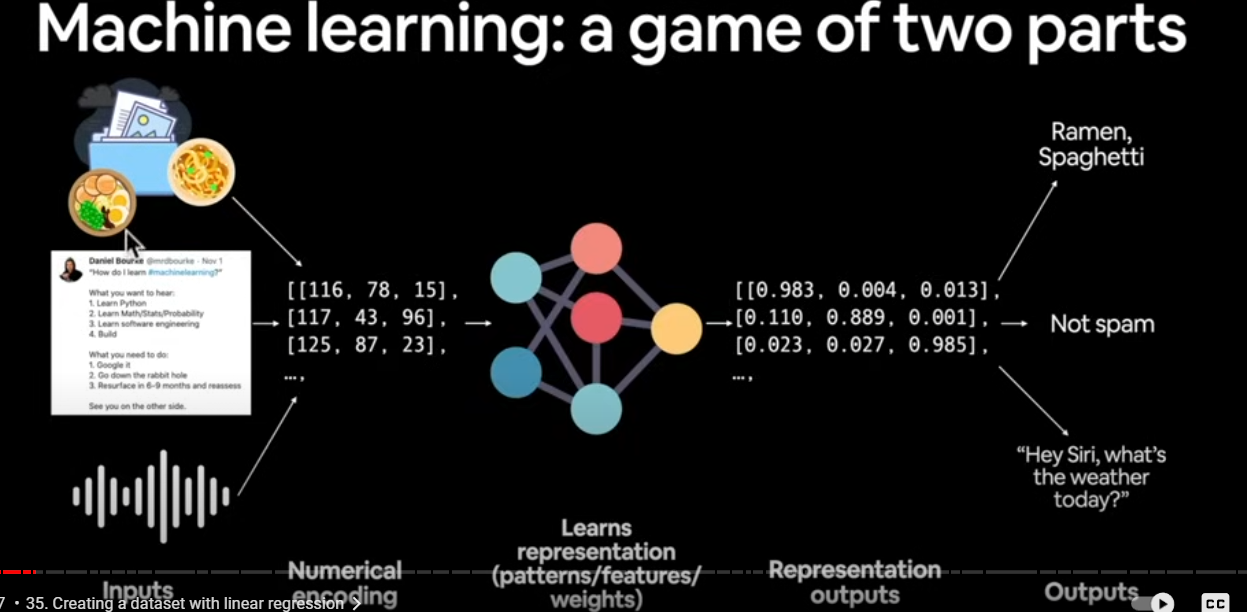

In [47]:
 Weight = 0.7
 bias = 0.3

start = 0
end = 1
step = 0.02

 X = torch.arange(start , end , step).unsqueeze(dim=1)
 y = Weight * X + bias

In [48]:
X[:10] , y[:10] ,len(X)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50)

In [49]:
X.shape , y.shape

(torch.Size([50, 1]), torch.Size([50, 1]))

In [50]:
# separate training and testiNG
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state=42)


In [51]:
X_train.shape, y_train.shape , X_test.shape , y_test.shape

(torch.Size([40, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([10, 1]))

In [52]:
def plot_prediction(train_data = X_train , train_label = y_train , test_data = X_test , test_label = y_test , prediction = None):


  plt.figure(figsize = (10,7))

  plt.scatter(train_data , train_label , c = "green", s=8 , label= "Training Data"   )

  plt.scatter(test_data , test_label , c = "blue", s=8 , label= "Test Data"   )

  if prediction is not None:
    plt.scatter(test_data , prediction , c = "red", s=8 , label= "Prediction"   )

  plt.legend(prop = {"size":14});

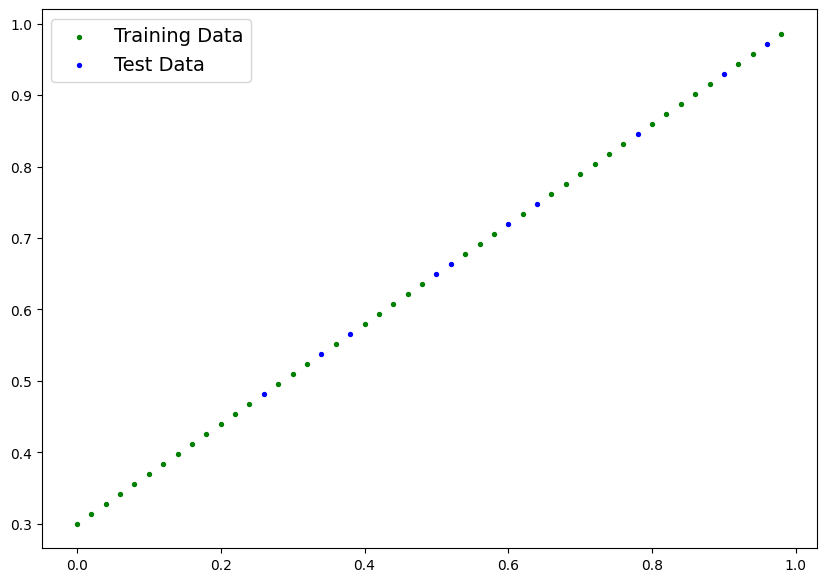

In [53]:
plot_prediction()

In [54]:
from torch import nn


In [55]:
#crdeating class
class LinearRegressionModule(nn.Module):
  def __init__(self):
    super().__init__()
    self.Weight = nn.Parameter(torch.randn(1 , requires_grad=True , dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1 , requires_grad=True , dtype=torch.float))

  def forward(self , X: torch.tensor) -> torch.tensor:
    return self.Weight * X + self.bias

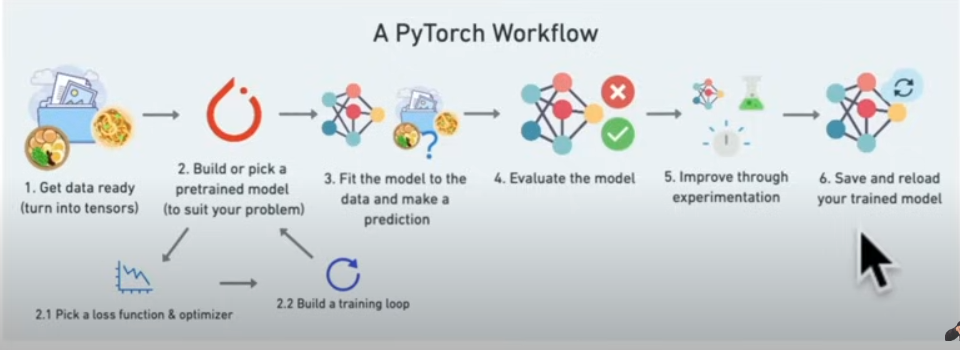

In [56]:
torch.manual_seed(42)

model_0 = LinearRegressionModule()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [57]:
with torch.inference_mode():
  y_preds = model_0(X_test)


In [58]:
y_preds , y_preds.shape , y_test , len(y_test) , len(y_preds)

(tensor([[0.2163],
         [0.3914],
         [0.3308],
         [0.4318],
         [0.2433],
         [0.4520],
         [0.3039],
         [0.2972],
         [0.3443],
         [0.2568]]),
 torch.Size([10, 1]),
 tensor([[0.4820],
         [0.8460],
         [0.7200],
         [0.9300],
         [0.5380],
         [0.9720],
         [0.6640],
         [0.6500],
         [0.7480],
         [0.5660]]),
 10,
 10)

In [59]:
import matplotlib.pyplot as plt


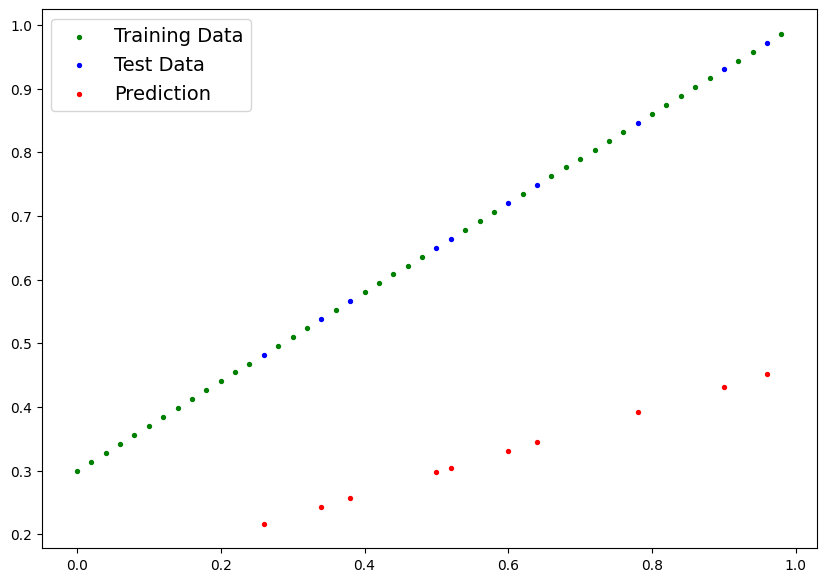

In [60]:
plot_prediction(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_label=y_test,
                 prediction=y_preds)

In [61]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [62]:
y_preds.shape , y_test.shape

(torch.Size([10, 1]), torch.Size([10, 1]))

Let's sing the @PyTorch optimization loop song JJ

It's train time!

do the forward pass,

calculate the loss,

optimizer zero grad,

losssss backwards!

Optimizer step step step

Let's test now!

with torch no grad:

do the forward pass,

calculate the loss,

watch it go down down down!

In [63]:
epochs = 100

# Create empty loss lists to track values
train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):

  model_0.train()

  y_pred = model_0(X_train)

  loss = loss_fn(y_pred , y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  # now for testing

  model_0.eval()

  with torch.inference_mode():

    test_pred = model_0(X_test)

    test_loss = loss_fn(test_pred , y_test)

    if epoch % 10 == 0:
            epoch_count.append(epoch)
            train_loss_values.append(loss.detach().numpy())
            test_loss_values.append(test_loss.detach().numpy())
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")








Epoch: 0 | MAE Train Loss: 0.340311199426651 | MAE Test Loss: 0.3720795214176178 
Epoch: 10 | MAE Train Loss: 0.21864214539527893 | MAE Test Loss: 0.24470801651477814 
Epoch: 20 | MAE Train Loss: 0.10375527292490005 | MAE Test Loss: 0.12293665111064911 
Epoch: 30 | MAE Train Loss: 0.06399796903133392 | MAE Test Loss: 0.06073009967803955 
Epoch: 40 | MAE Train Loss: 0.05161098390817642 | MAE Test Loss: 0.04132990166544914 
Epoch: 50 | MAE Train Loss: 0.04540504142642021 | MAE Test Loss: 0.03398849442601204 
Epoch: 60 | MAE Train Loss: 0.03980403393507004 | MAE Test Loss: 0.029580067843198776 
Epoch: 70 | MAE Train Loss: 0.034203048795461655 | MAE Test Loss: 0.02517164871096611 
Epoch: 80 | MAE Train Loss: 0.028602052479982376 | MAE Test Loss: 0.020763223990797997 
Epoch: 90 | MAE Train Loss: 0.02300105430185795 | MAE Test Loss: 0.016354799270629883 


In [64]:
torch.manual_seed(42)

model_0.eval()

with torch.inference_mode():
  y_preds = model_0(X_test)

In [65]:
y_preds , y_test

(tensor([[0.4983],
         [0.8281],
         [0.7140],
         [0.9043],
         [0.5490],
         [0.9423],
         [0.6632],
         [0.6505],
         [0.7393],
         [0.5744]]),
 tensor([[0.4820],
         [0.8460],
         [0.7200],
         [0.9300],
         [0.5380],
         [0.9720],
         [0.6640],
         [0.6500],
         [0.7480],
         [0.5660]]))

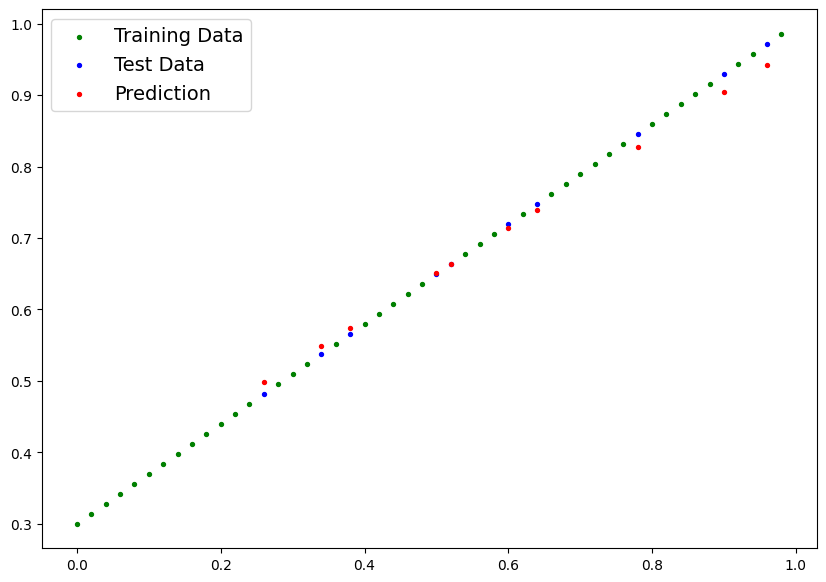

In [66]:
plot_prediction(train_data=X_train,
                 train_label=y_train,
                 test_data=X_test,
                 test_label=y_test,
                 prediction=y_preds)

In [67]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_0.pth


In [68]:
# Check the saved file path
!ls -l models/01_pytorch_workflow_model_0.pth

-rw-r--r-- 1 root root 1680 Sep  5 07:32 models/01_pytorch_workflow_model_0.pth


In [69]:
# Instantiate a new instance of our model (this will be instantiated with random weights)
loaded_model_0 = LinearRegressionModule()

# Load the state_dict of our saved model (this will update the new instance of our model with trained weights)
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<ipython-input-69-0d7efad8feed>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))


<All keys matched successfully>

In [70]:
# 1. Put the loaded model into evaluation mode
loaded_model_0.eval()

# 2. Use the inference mode context manager to make predictions
with torch.inference_mode():
    loaded_model_preds = loaded_model_0(X_test) # perform a forward pass on the test data with the loaded model

In [71]:
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [29]:
import torch
import matplotlib.pyplot as plt
from torch import nn


In [30]:
torch.__version__

'2.4.0+cu121'

In [31]:
#setting up device agnostic code
device = "cuda" if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [32]:
weight = 0.7
bias = 0.3

start = 0

end = 1

step = 0.02

X  = torch.arange(start , end , step).unsqueeze(dim=1)

y = weight *X + bias


In [33]:
X[:10] , y[:10] , X.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 torch.Size([50, 1]))

In [34]:
X.dtype , y.dtype

(torch.float32, torch.float32)

In [36]:
# splitting the data into training and test samples
train_split = int(0.8*len(X))

In [76]:
y[:train_split].shape

torch.Size([40, 1])

In [38]:
X_train , y_train = X[:train_split] , y[:train_split]
X_test , y_test = X[train_split:] , y[train_split:]

In [39]:
X_train[:10] , X_test[:5] , y_train[:10] , y_test[:5] , X_train.shape , X_test.shape , y_train.shape , y_test.shape

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.8000],
         [0.8200],
         [0.8400],
         [0.8600],
         [0.8800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160]]),
 torch.Size([40, 1]),
 torch.Size([10, 1]),
 torch.Size([40, 1]),
 torch.Size([10, 1]))

In [40]:
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)

In [41]:
X_train.device

device(type='cpu')

In [42]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [43]:
def plot_prediction(train_data = X_train , train_label = y_train , test_data = X_test , test_label = y_test , prediction = None):
  plt.figure(figsize=(6,6))

  plt.scatter(train_data.cpu().numpy() , train_label.cpu().numpy() , c='b' , s=3 , label='training data')
  plt.scatter(test_data.cpu().numpy() , test_label.cpu().numpy() , c='g' , s=3 , label='training data')
  if prediction is not None:
    plt.scatter(test_data.cpu().numpy() , prediction.cpu().numpy() , c='r' , s=3 , label = 'prediction')


  plt.legend(prop={'size':10})

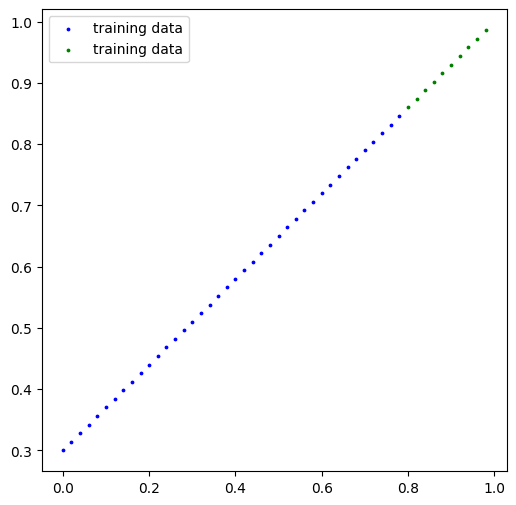

In [44]:
plot_prediction()

In [45]:
class LinearRegressionModuleV1(nn.Module):
  def __init__(self):
    super().__init__()
    self.linearlayer = nn.Sequential(
        nn.Linear(in_features=1 , out_features=2),
        nn.Linear(in_features=2 , out_features=1)
    )
  def forward(self , X : torch.Tensor) -> torch.Tensor:
    return self.linearlayer(X)

In [46]:
model_1 = LinearRegressionModuleV1().to(device)

In [47]:
model_1.eval()
with torch .inference_mode():
  y_preds = model_1(X_test)

In [48]:
y_preds , y_test

(tensor([[-0.1769],
         [-0.1769],
         [-0.1769],
         [-0.1769],
         [-0.1769],
         [-0.1769],
         [-0.1769],
         [-0.1769],
         [-0.1769],
         [-0.1769]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

In [49]:
next(model_1.parameters()).device

device(type='cpu')

**NOW THE NEXT STEP AFTER MODEL MAKING WE HAVE TO CHOOSE LOSS AND OPTIMIZER FOR OUR MODEL**

In [62]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_1.parameters(),lr=0.001)

In [63]:
torch.manual_seed(42)
epochs = 1000


for epoch in range(epochs):

  model_1.train()

  y_train_pred = model_1(X_train)

  loss = loss_fn(y_train_pred , y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_1.eval()

  with torch.inference_mode():
    test_pred = model_1(X_test)
    test_loss = loss_fn(test_pred , y_test)
    if epoch % 100 == 0:
      print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")







Epoch: 0 | MAE Train Loss: 0.012850982137024403 | MAE Test Loss: 0.025996197015047073 
Epoch: 100 | MAE Train Loss: 0.001111758523620665 | MAE Test Loss: 0.0009291768074035645 
Epoch: 200 | MAE Train Loss: 0.0011750325793400407 | MAE Test Loss: 0.0008397639030590653 
Epoch: 300 | MAE Train Loss: 0.001238080090843141 | MAE Test Loss: 0.0007507979753427207 
Epoch: 400 | MAE Train Loss: 0.001300846808589995 | MAE Test Loss: 0.0006624758243560791 
Epoch: 500 | MAE Train Loss: 0.0013632014160975814 | MAE Test Loss: 0.0005752384895458817 
Epoch: 600 | MAE Train Loss: 0.00142593530472368 | MAE Test Loss: 0.0004867195966653526 
Epoch: 700 | MAE Train Loss: 0.001488611102104187 | MAE Test Loss: 0.00039818882942199707 
Epoch: 800 | MAE Train Loss: 0.0015516482526436448 | MAE Test Loss: 0.0003090858517680317 
Epoch: 900 | MAE Train Loss: 0.0016140230000019073 | MAE Test Loss: 0.00022170544252730906 


In [64]:
model_1.eval()

with torch.inference_mode():

  y_prediction = model_1(X_test)


In [65]:
y_prediction , y_test

(tensor([[0.8576],
         [0.8715],
         [0.8855],
         [0.8995],
         [0.9134],
         [0.9274],
         [0.9414],
         [0.9553],
         [0.9693],
         [0.9833]]),
 tensor([[0.8600],
         [0.8740],
         [0.8880],
         [0.9020],
         [0.9160],
         [0.9300],
         [0.9440],
         [0.9580],
         [0.9720],
         [0.9860]]))

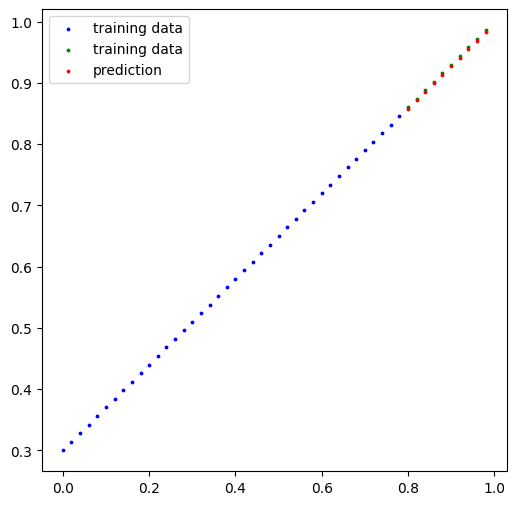

In [66]:
plot_prediction(train_data = X_train  , train_label = y_train , test_data = X_test ,test_label = y_test , prediction = y_prediction)

In [67]:
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(), # only saving the state_dict() only saves the models learned parameters
           f=MODEL_SAVE_PATH)

Saving model to: models/01_pytorch_workflow_model_1.pth


In [71]:
# Instantiate a fresh instance of LinearRegressionModelV2
loaded_model_1 = LinearRegressionModuleV1()

# Load model state dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# Put model to target device (if your data is on GPU, model will have to be on GPU to make predictions)
loaded_model_1.to(device)

print(f"Loaded model:\n{loaded_model_1}")
print(f"Model on device:\n{next(loaded_model_1.parameters()).device}")

Loaded model:
LinearRegressionModuleV1(
  (linearlayer): Sequential(
    (0): Linear(in_features=1, out_features=2, bias=True)
    (1): Linear(in_features=2, out_features=1, bias=True)
  )
)
Model on device:
cpu


<ipython-input-71-6f0bf489eb03>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


In [73]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_preds = loaded_model_1(X_test)
y_prediction == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])